# ICAT3190, Module 3, Preprocessing and feature extraction 

## Machine Learning


![machine_learning.svg](kuvat/machine_learning.svg)




## Feature extraction

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

* The purpose of feature extraction is to capture relevant properties of the samples into variables.
* Feature extraction requires domain knowledge and needs to be rethought for every project. It is therefore one of the most time consuming parts of machine learning processes.

## The purpose of machine learning
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$



# Case one, sound recognition
![featureextraction_p.svg](kuvat/timedomainaudio.png)

This sound sample contains noise from wind turbine, by-passing cars and some birds perhaps.

Can you find good features to find out what is the dominating noise source in which time?


## Perhaps there are differences in the sound pressure level (volume)

![SPL of the audio](kuvat/splaudio.png)

This picture shows the [A-weighted](https://en.wikipedia.org/wiki/A-weighting) sound pressure level (SPL) of the sound signal. It shows what is the subjective volume perceived by a human observer. SPL is a RMS average of the signal over certain time period

$$L_p = 20 \log_{10}\left( \frac{p_{rms}}{p_0}\right) \qquad p_{rms} = \sqrt{\frac{1}{T} \int_0^T p(t)^2 dt}$$


where $p_{rms}$ is the RMS average of the sound pressure, $p_0=20~\mu$P, is the reference sound pressure and ,$T=1$ s, is a time constant.Notice that $L_p$ is shown in logarithmic scale. Log transformation may sometimes be helpful.


## Perhaps studying different spectral components help

![Sectrogram of the audio](kuvat/sgramaudio.png)

This figure is obtained by splitting the signal in 1 second pieces and applying a Fourier transformation to them, and then by plotting the spectrum of each slice vertically. This method is called as Short Time Fourier Transformation (STFT) and is often usefull method for extracting features from the data.


# Case 2, What features could be used to classify Iris species?
| Setosa | Versicolor | Virginica |
| -------| ---------- |-----------|
| ![Setosa](kuvat/I-setosa-var-arctica.jpg "Setosa") | ![Versicolor](kuvat/Iris_versicolor_3.png "Versicolor") | ![Virginica](kuvat/1200px-Iris_virginica.jpg "Virginica") |
<span id="kuvaviite">Wikimedia Commons</span>


## Features measured by Fisher

One of the most famos data sets of statistics is the Iris-dataset by Fisher. Let's take a look what features he measured and how do they perform. 

Lets read the data set and plot the head of it.

In [2]:
import numpy as np
import seaborn as sns   
sns.set(style='ticks')  
iris = sns.load_dataset('iris')   
print(iris.shape)
iris.head() 

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Seaborn

The Seaborn library is another library for plotting data, in addition to Matplotlib which we used earlier. Seaborn is especially good for statistical plots, mut it has unfortunately totally different API than matplotlib. It may be good to use Matplotlib usually, but it you find some plots inconvenient to be plotted with matplotlib, then it is time to check what seaborn can offer. Easiest way is to check the [example gallery](https://python-graph-gallery.com/all-charts/) to see if someone has made a similar plot what you need, and copy and modify the source code, which is given in the gallery.

Study the pairplots below, and consider following questions:

1. Can you separate the three species with only one feature? Can you separate one species with one feature?
1. Can you separate all three species by combining two features?
1. Which of the features has the biggest discriminative power (which can separate the different species most efficienty)?

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


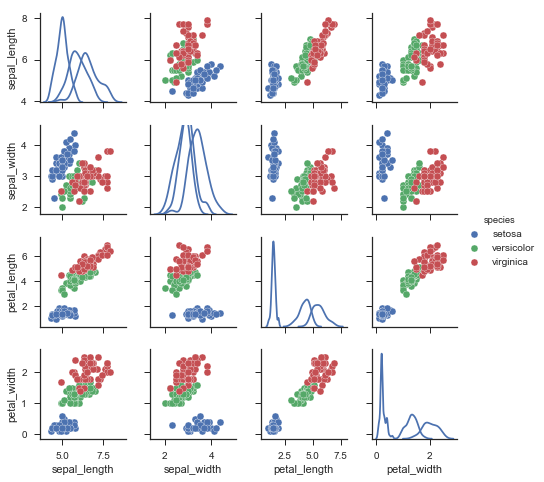

In [11]:
sns.pairplot(iris, hue="species", diag_kind='kde', size=1.7);


We could have used also a scatter matrix from Pandas, but is not as nice.

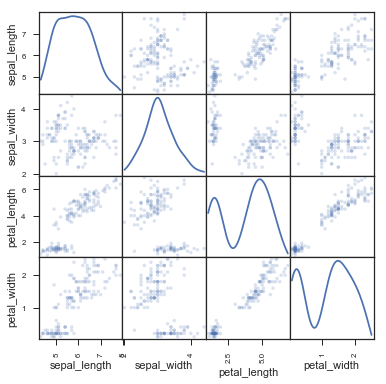

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.2, figsize=(6, 6), diagonal='kde');


## Hypothesis testing

It looks like petal_length can nicely separate Setosa's from other species, but not necessary Versicolor from Virginica. Lets test formally if this observation is correct.

Let's start by examining if the petal lengts are significantly different or not by forming two hypothesis:

1. The distribution of petal lengths of Setosa species is different than the distribution of petal lengts of other species
1. Let's also assume that the distribution of petal lengts of Versicolor is siginificantly different than that of Virginica

The standard test for these hypothesis is the [Student's T-test](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/). 

But the T-test can only be used if the variables are normally distributed. Let's test that first.

In [5]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [6]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


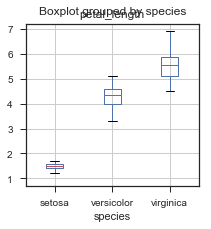

In [7]:
iris.boxplot('petal_length', by='species', figsize=(3,3));

## Applying an external function to data

In [8]:
iris.groupby('species').petal_length.apply(np.mean)

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

## Testing if distribution of the variables is normal

Read more about normality testing methods from [Statistics howto](https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/)

In [47]:
from scipy.stats import normaltest

# Run normality test, and print the output
print(normaltest(iris.petal_length))

# Interpretation, we discard the hypothesis of normal distribution
# if it's probability (the p-value) is less than 95%
alpha=0.05
statistis, pvalue=normaltest(iris.petal_length)
if pvalue<alpha:
    print("Data is normal distributed")
else:
    print("Data is not normal distributed")

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
Data is normal distributed


But we were supposed to test this for all species separately

In [48]:
# 
# It can be done by grouping the data by species, selecting the petal_lenght
# and applying the normal test to all species separately
results=iris.groupby('species').petal_length.apply(normaltest)
print(results)
if (results[0][1] < alpha):     print("Petal length of Setosa is normally distributed")
if (results[1][1] < alpha):     print("Petal length of Versicolor is normally distributed")
if (results[2][1] < alpha):     print("Petal length of Virginica is normally distributed")

species
setosa        (2.236973547672174, 0.32677390349997293)
versicolor     (3.3182862415011867, 0.190301976072032)
virginica     (2.6991800572037943, 0.2593465635270746)
Name: petal_length, dtype: object


They do not seem to be normally distributed!

## Test the similarity of petal_length distributions

(*We try to use T-test even though we do not have the autorization, because the variable is not normally distributed!*)

1. Two-sided test for the null hypothesis that two independent samples have identical average (expected) values. Example: `p=ttest_ind(a,b)`
1. Two-sided test for the null hypothesis that the expected value of a sample of independent observations `a` is equal to the given population mean, `popmean`. Example: `p=ttest_1samp(a, popmean)`
1. Two-sided test for the null hypothesis that two related or repeated or paired samples have identical average (expected) values. Example: `p=ttest_rel(a,b)`
1. Two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. Example: `ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)`

Here all tests are two sided, meaning that we do not have any a-priori knowlwdge that one would be bigger than another.

In [10]:
# T-test of two independent data sets
from scipy.stats import ttest_ind 

# Test if the petal_lengths of the Setosas are different than the petal_lengths other flowers
test=ttest_ind(iris[iris.species=='setosa'].petal_length, iris[iris.species!='setosa'].petal_length)
if test.pvalue < alpha:
    print("The petal_length of setosa are statistically different "
          +"than the petal_length of other flowers. p=%4.3f" % test.pvalue)
else:
    print("The petal_length of setosa are not statistically different "
          +"than the petal_length of other flowers: p=%4.3f" % test.pvalue)
    
# Test if the petal_lengths of Versicolor and Virginia are different
test=ttest_ind(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length)
if test.pvalue < alpha:
    print("The petal_lengths of Versicolor and Virginica are statistically different "
          +": p=%4.2f" % test.pvalue)
else:
    print("The petal_lengths of Versicolor and Virginica are not statistically different "
          +": p=%4.2f" % test.pvalue)

The petal_length of setosa are statistically different than the petal_length of other flowers. p=0.000
The petal_lengths of Versicolor and Virginica are statistically different : p=0.00


## Non-parametric testing
Because the data is not normally distributed, we are not allowed to use the T-test, but we need to use non-parametric tests instead. One often used is the [Mann-Whitney rank-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). Because this test does not assume anything about the shape of the distributions, it usually needs larger sample size to get reliable estimate of p-values. Sample size bigger than 20 for both classes is recommended.

In [55]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length))

MannwhitneyuResult(statistic=44.5, pvalue=4.5667723638341282e-17)


The p-value of $4.56 \cdot 10^{-17} < \alpha$ we can conclude that the difference of the petal lenghts of versicolor and virginica is statistically significant.

## What was learned?

- Some mesured values (petal and sepal widhts and heights in this case) can be used as features, describing the similarities and differences of the samples
- T-test can be used for testing if the values of the features are the same or different for different classes of samples. If the features are not significantly different, they are not usefull for classification.
- T-test can only be used if the variables are normally distributed. 
- Non-parametric tests can be used if the data is not normally distributed, but it may need larger sample size

Now we can be certain, that the petal lengts are different in all species, and the difference is statistically significant, meaning that they are not different only by chance.

# Using features for recognizing species

Now that we know that petal_lengths are different for each species, can this feature be used in recognizing flowers or classifying flower species?


A demo is shown.